# Molliere radius

The purpose of this example is to find the width of an electromagnetic shower by scanning the radius of a target and seeing at what point no more energy can escape.

The Molliere Radius is defined as the radius where 90% of the shower is contained inside the target

## Code setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats
import ROOT
import os
import copy

Welcome to JupyROOT 6.18/02


In [2]:
%matplotlib notebook

# plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100
# 
# #colorCycle = plt.rcParams['axes.prop_cycle']
# plt.rcParams['figure.max_open_warning'] = 100

In [3]:
# %%javascript
# IPython.OutputArea.prototype._should_scroll = function(lines) {
#     return false;
# }

In [4]:
#Setup MiniScatter
import sys
MiniScatter_path="../build/."
sys.path.append(MiniScatter_path)
#import CLEARview

import miniScatterDriver
import miniScatterScanner
import miniScatterPlots

## Physics setup

In [5]:
### Basic simulation parameters ###

QUIET = False
TRYLOAD = True #Try to load already existing data instead of recomputing?

baseSimSetup = {}
#baseSimSetup["PHYS"] = "QGSP_BERT__SS"
baseSimSetup["PHYS"] = "QGSP_BERT"
baseSimSetup["N"] = 50000

#Disable the default target
baseSimSetup["THICK"] = 0.0

#Make a round target
baseSimSetup["MAGNET"] = []
#DeltaE-detector
m1 = {}
m1["pos"]      = 0.0
m1["type"]     = "TARGETR"
m1["length"]   = 150.0 #[mm] 
m1["gradient"] = 0.0
m1["keyval"] = {}
m1["keyval"]["material"] = "G4_W"
m1["keyval"]["radius"]    = 1.0 #[mm]
#m1["keyval"]["height"]   = 15.0 #[mm]
baseSimSetup["MAGNET"].append(m1)

baseSimSetup["WORLDSIZE"] = 40.0 #[mm], x-y size of the world

baseSimSetup["DIST"] = 100.0 #Perfect-detector position [mm] 

baseSimSetup["QUICKMODE"] = False #Include slow plots
baseSimSetup["MINIROOT"]  = True #Skip TTRees in the .root files

#Lowest energy particles to consider for analysis
#E_CUTOFF = baseSimSetup["ENERGY"]*0.9;

#Store the .root files in a subfolder from MiniScatter/examples, to be easy to find
baseSimSetup["OUTFOLDER"]=os.path.join(os.getcwd(),"Molliere")


In [6]:
# Test simulation
baseSimSetup_test = baseSimSetup.copy()
baseSimSetup_test["BEAM"]    = "e-"
baseSimSetup_test["ENERGY"]  = 10.0 #[MeV]
baseSimSetup_test["OUTNAME"] = "test"

(twiss_test, numPart_test, objects_test) = \
    miniScatterDriver.getData_tryLoad(baseSimSetup_test, tryload=TRYLOAD,\
    getObjects=["magnet_1_edep","metadata"])

Found a file at '/home/kyrsjo/code/MiniScatter/examples/Molliere/test.root', loading!
No target twiss data in this file!
No particles found for det=tracker_cutoff


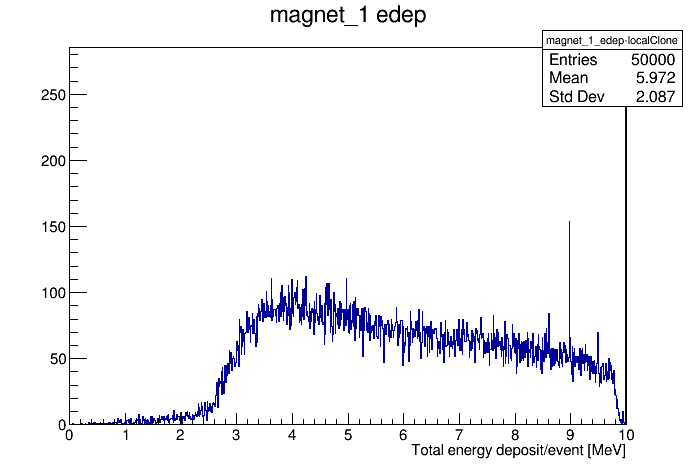

In [7]:
c1 = ROOT.TCanvas()

objects_test["magnet_1_edep"].Draw()

c1.Draw()

In [16]:
baseSimSetup_rScan = copy.deepcopy(baseSimSetup)

rScan = [0.1,0.5,1.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,32.0]

baseSimSetup_rScan["BEAM"]    = "e-"
baseSimSetup_rScan["ENERGY"]  = 10.0 #[MeV]

del baseSimSetup_rScan["MAGNET"][0]["keyval"]['radius']
del baseSimSetup_rScan["OUTFOLDER"]

(twiss_rScan, numpart_rScan, objects_rScan, analysisOutput_rScan) =\
    miniScatterScanner.ScanMiniScatter("MAGNET0.keyval.radius",rScan,\
                                       baseSimSetup_rScan, COMMENT="rScan",\
                                       tryLoad=TRYLOAD, getObjects=["magnet_1_edep"])
                                   

LoadFile filename and status: 'SaveSim_MAGNET0.keyval.radius_rScan.h5' True
Loading...
Scan variable ranges did not match, run with tryLoad=False to recompute.
Now : [0.1, 0.5, 1.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 32.0]
File: [ 0.1  0.5  1.   2.   4.   6.   8.  10.  12.  14.  16. ]


ValueError: ScanVar range did not match with loaded file

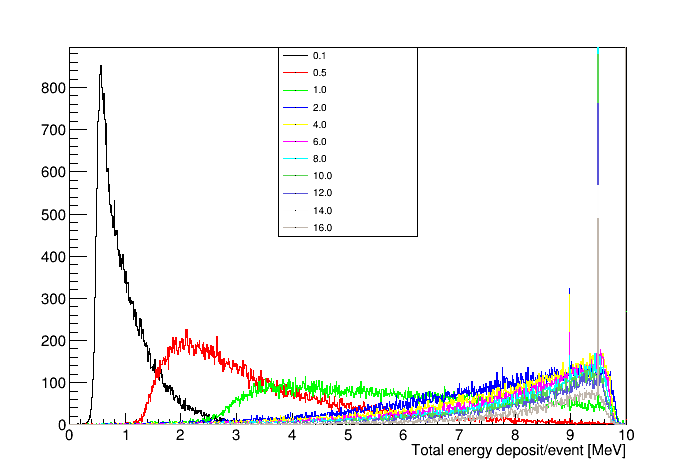

In [9]:
c1 = ROOT.TCanvas()
leg = ROOT.TLegend(0.4, 0.5, 0.6,0.9)

meanEdep_rScan = []

#colors = [ROOT.kBlue, ROOT.kRed, ROOT.kGreen, ROOT.kOrange, ROOT.kGray, ROOT.kPurple, ROOT.kMagenta, ]

for obj,i in zip(objects_rScan["magnet_1_edep"],range(len(objects_rScan["magnet_1_edep"]))):
    meanEdep_rScan.append(obj.GetMean())
    if i == 0:
        obj.Draw()
        obj.SetStats(False)
        obj.SetTitle("")
    else:
        obj.Draw("same")
    obj.SetLineColor(i+1)
    leg.AddEntry(obj,str(rScan[i]))
leg.Draw()
c1.Draw()


<IPython.core.display.Javascript object>


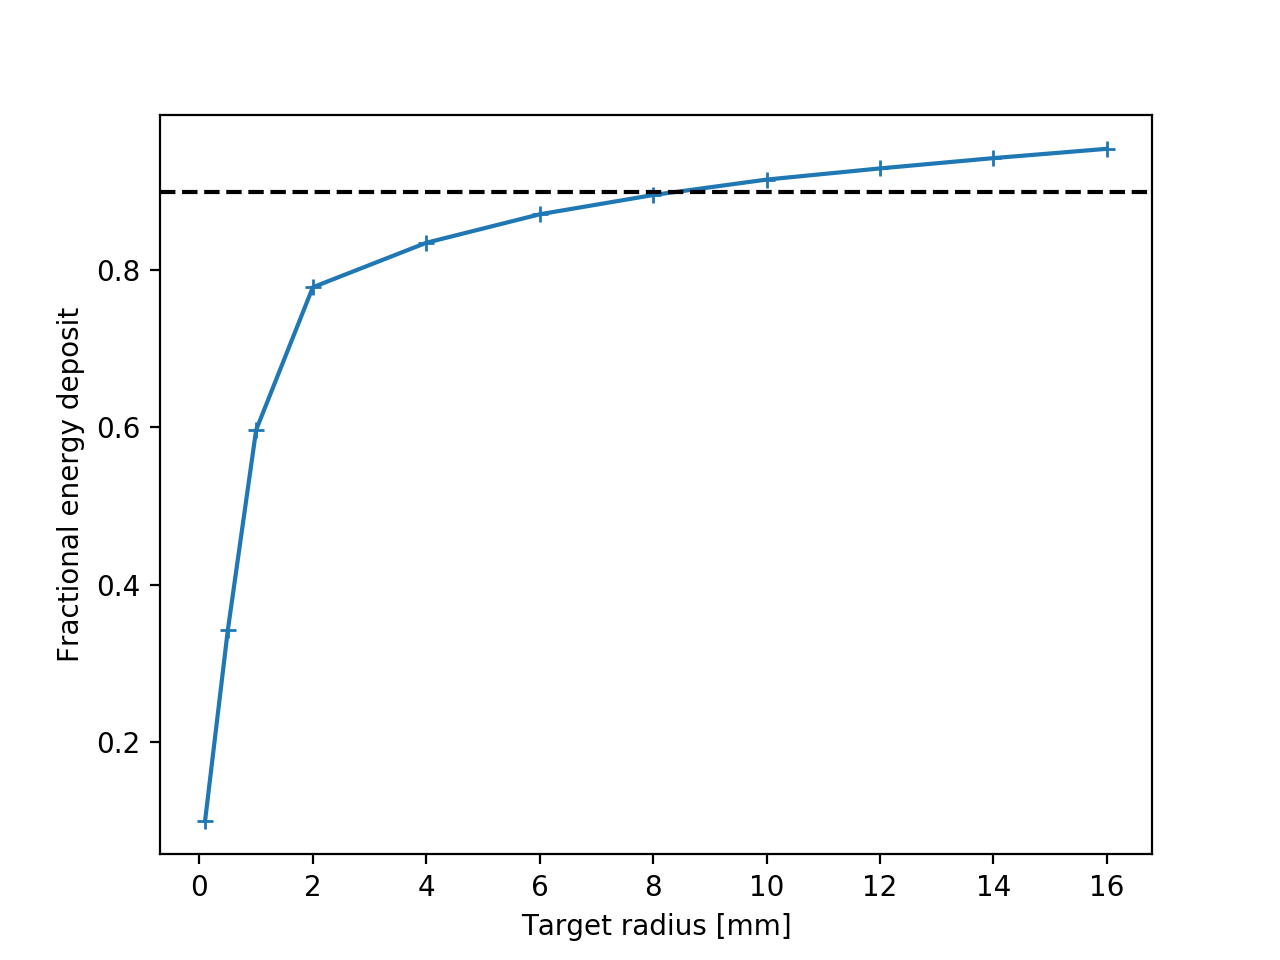

In [15]:
plt.figure()
plt.plot(rScan,np.asarray(meanEdep_rScan)/baseSimSetup_rScan["ENERGY"], "-+")
plt.axhline(0.9, ls="--",color="k")
plt.xlabel("Target radius [mm]")
plt.ylabel("Fractional energy deposit")
plt.draw()